In [209]:
import pandas as pd
from dateutil import parser

In [210]:
df_off = pd.read_csv("NFL-offense-training-data.csv")
df_def = pd.read_csv("NFL-defense-training-data.csv")

In [211]:
df_off = df_off.sort_values(by=['Tm', 'Year']).reset_index(drop=True)
df_off = df_off.add_prefix('off_')
df_def = df_def.sort_values(by=['Tm', 'Year']).reset_index(drop=True)
df_def = df_def.add_prefix('def_')

In [212]:
df_train = df_off.join(df_def)
df_train.head()

,off_Rank,off_Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,def_Year
0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,274,...,17,4.4,117,111,969,22,36.4,12.3,-93.81,2002
1,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,256,...,17,4.0,120,86,754,22,36.8,12.4,-2.10,2003
2,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,280,...,12,4.7,101,139,1121,28,27.1,14.8,162.40,2004
3,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,304,...,22,4.0,83,103,819,31,30.3,13.1,118.27,2005
4,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,298,...,16,4.1,114,95,815,31,37.6,18.2,148.96,2006


In [213]:
df_train = df_train.drop(columns=['def_Tm', 'def_Year'])
df_train = df_train.rename(columns={'off_Year' : 'Year', 'off_Tm': 'Tm'})

In [214]:
df_train['Super_Bowl_Win'] = 0
df_train.head()

,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,Super_Bowl_Win
0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,274,...,17,4.4,117,111,969,22,36.4,12.3,-93.81,0
1,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,256,...,17,4.0,120,86,754,22,36.8,12.4,-2.10,0
2,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,280,...,12,4.7,101,139,1121,28,27.1,14.8,162.40,0
3,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,304,...,22,4.0,83,103,819,31,30.3,13.1,118.27,0
4,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,298,...,16,4.1,114,95,815,31,37.6,18.2,148.96,0


In [215]:
df_super_bowl_winners = pd.read_csv("super-bowl-winners.csv")
df_super_bowl_winners.head()

,Date,SB,Winner,Pts,Loser,Pts.1,MVP,Stadium,City,State
0,Feb 13 2022,LVI (56),Los Angeles Rams,23,Cincinnati Bengals,20,Cooper Kupp,SoFi Stadium,Inglewood,California
1,Feb 7 2021,LV (55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida
2,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
3,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
4,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota


In [216]:
for j in range(len(df_super_bowl_winners)):
    for i in range(len(df_train)):
        if(df_train.iloc[i]['Tm'] == df_super_bowl_winners.iloc[j]['Winner']):
            local_year = parser.parse(df_super_bowl_winners.iloc[j]['Date']).year - 1
            if(local_year == df_train.iloc[i]['Year']):
                df_train.at[i, 'Super_Bowl_Win'] = 1
                break

In [217]:
temp_column = df_train.pop('Super_Bowl_Win')
df_train.insert(0, 'Super_Bowl_Win', temp_column)

In [218]:
df_train.head()

,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_Yds.2,def_TD.1,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP
0,0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,...,2146,17,4.4,117,111,969,22,36.4,12.3,-93.81
1,0,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,...,1915,17,4.0,120,86,754,22,36.8,12.4,-2.10
2,0,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,...,2105,12,4.7,101,139,1121,28,27.1,14.8,162.40
3,0,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,...,1632,22,4.0,83,103,819,31,30.3,13.1,118.27
4,0,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,...,1897,16,4.1,114,95,815,31,37.6,18.2,148.96


In [219]:
df_train['Point_Dif'] = df_train['off_PF'] - df_train['def_PA']
df_train['TO_Dif'] = df_train['def_TO'] - df_train['off_TO']

In [220]:
abs(df_train.corr(numeric_only=True)).sort_values('Super_Bowl_Win', ascending=False)

,Super_Bowl_Win,off_Rank,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,off_1stD,...,def_Y/A,def_1stD.2,def_Pen,def_Yds.3,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif
Super_Bowl_Win,1.000000e+00,1.575640e-01,1.019813e-15,0.149143,0.092553,0.045012,0.094369,0.095980,0.049885,0.087097,...,0.060161,0.072692,0.007465,0.011707,0.019696,0.148506,0.136766,0.142247,2.114952e-01,1.590873e-01
Point_Dif,2.114952e-01,8.321341e-01,1.579470e-15,0.821145,0.595277,0.304776,0.577869,0.511514,0.306567,0.564238,...,0.157093,0.482474,0.023367,0.024991,0.015982,0.584468,0.515994,0.358837,1.000000e+00,6.885445e-01
def_PA,1.809187e-01,2.803925e-01,1.322987e-01,0.185236,0.002899,0.003319,0.007318,0.295279,0.124741,0.001375,...,0.401910,0.564786,0.029749,0.028891,0.159130,0.872837,0.455348,0.691751,7.129487e-01,5.199144e-01
def_NY/A,1.716534e-01,1.994346e-01,8.840595e-03,0.130664,0.046556,0.067650,0.086619,0.034703,0.053734,0.056180,...,0.322339,0.379268,0.008063,0.036164,0.050390,0.747359,0.332021,0.650085,5.317531e-01,2.848724e-01
def_Int,1.644290e-01,3.414697e-01,5.358378e-02,0.273629,0.015325,0.008513,0.022432,0.103670,0.027717,0.025133,...,0.110087,0.210684,0.002003,0.044469,0.126946,0.517054,0.837182,0.469885,4.546650e-01,6.549206e-01
def_Rank,1.624271e-01,2.950330e-01,2.788411e-15,0.271419,0.109385,0.095075,0.090143,0.406701,0.226544,0.123889,...,0.347730,0.527438,0.000243,0.021122,0.086215,0.765584,0.369899,0.491695,7.330024e-01,5.292925e-01
TO_Dif,1.590873e-01,5.657672e-01,2.754389e-15,0.541778,0.256220,0.045645,0.294488,0.728102,0.502158,0.222042,...,0.011576,0.220473,0.024958,0.019539,0.011585,0.422342,0.747362,0.252884,6.885445e-01,1.000000e+00
off_Rank,1.575640e-01,1.000000e+00,2.211178e-16,0.937953,0.757139,0.363709,0.745214,0.414014,0.263995,0.695936,...,0.061884,0.262056,0.033688,0.061013,0.024387,0.227283,0.439062,0.116606,8.321341e-01,5.657672e-01
off_PF,1.491426e-01,9.379527e-01,1.076779e-01,1.000000,0.831871,0.424416,0.803877,0.476515,0.328100,0.791850,...,0.106962,0.216467,0.008534,0.058537,0.107118,0.108680,0.352514,0.060137,8.211450e-01,5.417776e-01
def_Y/P,1.489668e-01,3.595602e-02,4.554577e-02,0.051037,0.206861,0.010478,0.244614,0.095352,0.141026,0.214605,...,0.632876,0.462501,0.016182,0.062679,0.048019,0.753660,0.258954,0.717991,3.859875e-01,1.549926e-01


# In Depth Look at Reasoning Behind Logistic Regression

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

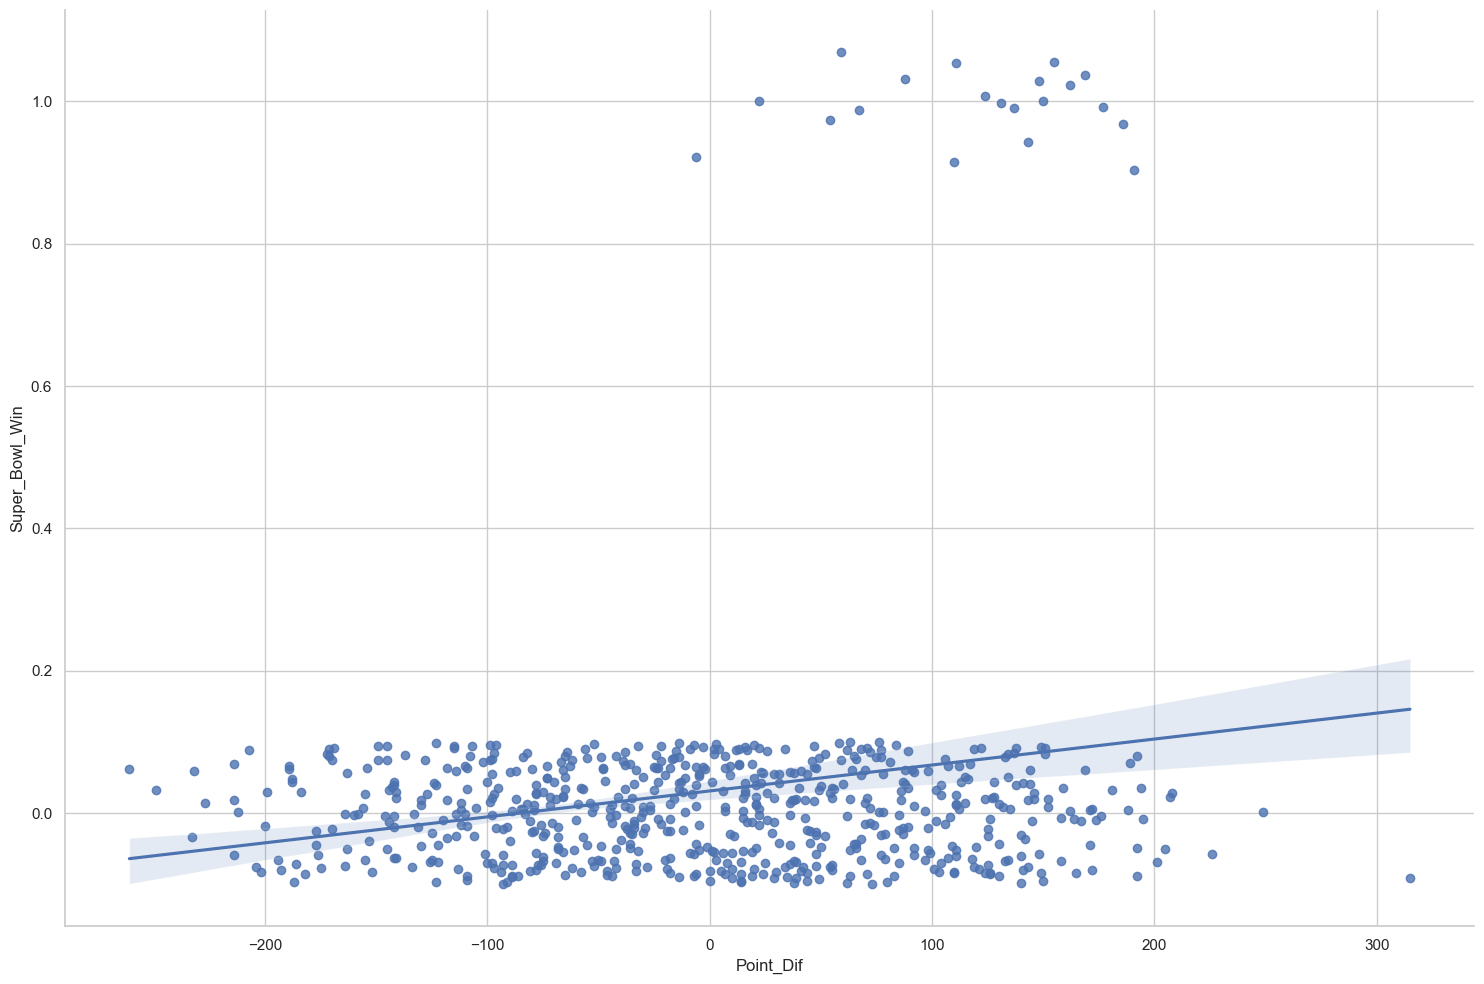

In [222]:
#label_encoder = preprocessing.LabelEncoder()
#df.diagnosis = label_encoder.fit_transform(df.diagnosis)
sns.set(style = 'whitegrid')
sns.lmplot(x = 'Point_Dif', y = 'Super_Bowl_Win', data = df_train, height = 10, aspect = 1.5, y_jitter = 0.1)

# One in Ten Rule

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [224]:
x1 = np.array(df_train['Point_Dif'])
x2 = np.array(df_train['TO_Dif'])
y = np.array(df_train['Super_Bowl_Win'])
x1 = preprocessing.scale(x1)
x2 = preprocessing.scale(x2)
df_train['Standardized_Point_Dif'] = x1
df_train['Standardized_TO_Dif'] = x2

In [230]:
X = df_train[['Standardized_Point_Dif', 'Standardized_TO_Dif']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LogisticRegression(max_iter = 5000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [231]:
df_test = pd.DataFrame(x_test, columns=['x_test'])
df_test['y_test'] = y_test
df_test['y_predict'] = clf.predict(x_test)
df_test[['lose_probability', 'win_probability']] = clf.predict_proba(x_test)
df_test

,x_test,y_test,y_predict,lose_probability,win_probability
419,NaN,0,0,0.943062,0.056938
224,NaN,0,0,0.992988,0.007012
151,NaN,0,0,0.995822,0.004178
65,NaN,0,0,0.993856,0.006144
533,NaN,0,0,0.973962,0.026038
...,...,...,...,...,...
288,NaN,0,0,0.995222,0.004778
440,NaN,0,0,0.961263,0.038737
271,NaN,0,0,0.969625,0.030375
205,NaN,0,0,0.995024,0.004976


In [235]:
df_test[df_test.y_test == 1]

,x_test,y_test,y_predict,lose_probability,win_probability
264,NaN,1,0,0.970613,0.029387
389,NaN,1,0,0.952368,0.047632
375,NaN,1,0,0.915326,0.084674
580,NaN,1,0,0.919952,0.080048
400,NaN,1,0,0.917427,0.082573
497,NaN,1,0,0.953463,0.046537
385,NaN,1,0,0.925435,0.074565
317,NaN,1,0,0.939076,0.060924


In [239]:
df_train[['Lose_Probability', 'Win_Probability']] = clf.predict_proba(X)
df_train

,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability
0,0,28,Arizona Cardinals,16,262,4563,1003,4.5,35,13,...,22,36.4,12.3,-93.81,-155,-10,-1.535081,-1.054477,0.997709,0.002291
1,0,31,Arizona Cardinals,16,225,4490,981,4.6,36,14,...,22,36.8,12.4,-2.10,-227,-13,-2.248150,-1.370820,0.998942,0.001058
2,0,25,Arizona Cardinals,16,284,4550,1047,4.3,29,11,...,28,27.1,14.8,162.40,-38,1,-0.376342,0.105448,0.990679,0.009321
3,0,16,Arizona Cardinals,16,311,5575,1075,5.2,37,16,...,31,30.3,13.1,118.27,-76,-11,-0.752685,-1.159925,0.995206,0.004794
4,0,18,Arizona Cardinals,16,314,5000,999,5.0,30,13,...,31,37.6,18.2,148.96,-75,3,-0.742781,0.316343,0.993138,0.006862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,9,Washington Redskins,16,388,5661,1011,5.6,22,11,...,24,35.4,14.9,-55.35,9,5,0.089134,0.527239,0.983857,0.016143
636,0,11,Washington Redskins,16,396,6454,1009,6.4,21,9,...,34,38.5,11.8,-32.66,13,0,0.128749,0.000000,0.985177,0.014823
637,0,15,Washington Redskins,16,342,5199,982,5.3,27,14,...,31,35.9,11.8,120.68,-46,-4,-0.455572,-0.421791,0.992378,0.007622
638,0,28,Washington Redskins,16,281,4795,967,5.0,19,4,...,24,35.1,14.6,-87.52,-78,7,-0.772492,0.738134,0.992635,0.007365


In [243]:
df_train = df_train.sort_values(by=['Win_Probability', 'Super_Bowl_Win'], ascending=False)
df_train.head(30)

,Super_Bowl_Win,off_Rank,Tm,off_G,off_PF,off_Yds,off_Ply,off_Y/P,off_TO,off_FL,...,def_1stPy,def_Sc%,def_TO%,def_EXP,Point_Dif,TO_Dif,Standardized_Point_Dif,Standardized_TO_Dif,Lose_Probability,Win_Probability
378,0,0,New England Patriots,16,589,6580,1058,6.2,15,6,...,15,24.0,16.6,125.67,315,16,3.119680,1.687163,0.704040,0.295960
383,0,0,New England Patriots,16,557,6846,1191,5.7,16,7,...,33,30.1,20.4,83.26,226,25,2.238246,2.636193,0.818175,0.181825
381,0,0,New England Patriots,16,518,5820,986,5.9,10,5,...,23,30.7,21.0,71.86,205,28,2.030268,2.952536,0.836505,0.163495
57,0,0,Baltimore Ravens,16,531,6521,1064,6.1,15,7,...,39,32.5,14.5,21.61,249,10,2.466033,1.054477,0.839854,0.160146
229,0,0,Green Bay Packers,16,560,6482,988,6.6,14,6,...,16,33.9,20.2,52.98,201,24,1.990653,2.530745,0.854651,0.145349
390,0,6,New England Patriots,16,420,5664,1095,5.2,15,6,...,39,19.1,17.0,166.75,195,21,1.931230,2.214402,0.870453,0.129547
93,0,0,Carolina Panthers,16,500,5871,1060,5.5,19,9,...,26,26.5,19.4,117.70,192,20,1.901519,2.108954,0.876440,0.123560
557,1,8,Seattle Seahawks,16,417,5424,973,5.6,19,10,...,43,24.7,19.4,129.49,186,20,1.842097,2.108954,0.882605,0.117395
265,0,2,Indianapolis Colts,16,450,5739,1020,5.6,19,5,...,15,25.3,21.6,120.41,188,18,1.861904,1.898059,0.885755,0.114245
227,0,2,Green Bay Packers,16,461,6065,1042,5.8,16,8,...,36,25.3,21.0,164.58,164,24,1.624214,2.530745,0.893821,0.106179


# Break Here!!! Utilizing 5 features in prediction

In [174]:
x1 = np.array(df_train['Point_Dif'])
x2 = np.array(df_train['def_Int'])
x3 = np.array(df_train['def_NY/A'])
x4 = np.array(df_train['off_NY/A'])
x5 = np.array(df_train['off_TO'])
y = np.array(df_train['Super_Bowl_Win'])
x1 = preprocessing.scale(x1)
x2 = preprocessing.scale(x2)
x3 = preprocessing.scale(x3)
x4 = preprocessing.scale(x4)
x5 = preprocessing.scale(x5)
df_train['Standardized_Point_Dif'] = x1
df_train['Standardized_def_Int'] = x2
df_train['Standardized_def_NY/A'] = x3
df_train['Standardized_off_NY/A'] = x4
df_train['Standardized_off_TO'] = x5

In [199]:
X = df_train[['Standardized_Point_Dif', 'Standardized_def_Int', 'Standardized_def_NY/A', 'Standardized_off_NY/A', 'Standardized_off_TO']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = LogisticRegression(max_iter = 5000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

In [200]:
df_test = pd.DataFrame(x_test, columns=['x_test'])
df_test['y_test'] = y_test
df_test['y_predict'] = clf.predict(x_test)
df_test[['lose_probability', 'win_probability']] = clf.predict_proba(x_test)
df_test

,x_test,y_test,y_predict,lose_probability,win_probability
277,NaN,0,0,0.996777,0.003223
346,NaN,0,0,0.998428,0.001572
258,NaN,0,0,0.998075,0.001925
366,NaN,0,0,0.993534,0.006466
186,NaN,0,0,0.997844,0.002156
...,...,...,...,...,...
135,NaN,0,0,0.993115,0.006885
542,NaN,0,0,0.998015,0.001985
226,NaN,0,0,0.953359,0.046641
347,NaN,0,0,0.979842,0.020158


In [201]:
num_correct = 0
num_super_bowl = 0
num_correct_super_bowl = 0
for i in range(len(df_test)):
    print('Test: ' + str(df_test.iloc[i]['y_test']))
    print('Prediction: ' + str(df_test.iloc[i]['y_predict']))
    if (df_test.iloc[i]['y_test'] == df_test.iloc[i]['y_predict']):
        num_correct+=1
    if (df_test.iloc[i]['y_test'] == 1):
        num_super_bowl+=1
    if (df_test.iloc[i]['y_predict'] == 1):
        num_correct_super_bowl+=1
print(num_correct/len(df_test))
print(num_super_bowl)
print(num_correct_super_bowl)
print(num_correct_super_bowl/num_super_bowl)

Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 1.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 1.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Prediction: 0.0
Test: 0.0
Pr

In [202]:
df_test[df_test.y_test == 1]

,x_test,y_test,y_predict,lose_probability,win_probability
317,NaN,1,0,0.898815,0.101185
264,NaN,1,0,0.933568,0.066432
385,NaN,1,0,0.978811,0.021189
486,NaN,1,0,0.952415,0.047585
